In [1]:
# pip install numpy==1.26.4

In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# !unzip "/content/imdb_dataset.zip"

In [5]:
def load_data(data_dir):
    data = []
    for label in ['pos', 'neg']:
        label_dir = os.path.join(data_dir, label)
        for file in os.listdir(label_dir):
            if file.endswith('.txt'):
                with open(os.path.join(label_dir, file), 'r', encoding='utf-8') as f:
                    text = f.read()
                data.append({
                    'text': text,
                    'label': 1 if label == 'pos' else 0
                })
    return pd.DataFrame(data)

In [6]:
train_data = load_data('/kaggle/input/imdb-review-dataset/train')
test_data = load_data('/kaggle/input/imdb-review-dataset/test')

In [7]:
print(f"Train data shape :",train_data.shape)
print(f"Test data shape :",test_data.shape)

Train data shape : (25000, 2)
Test data shape : (25000, 2)


- 1 is for positive sentiment
- 0 is for negative sentiment

In [8]:
train_data.head(5)

,text,label
0,This was one of those wonderful rare moments i...,1
1,Have you seen The Graduate? It was hailed as t...,1
2,"I don't watch a lot of TV, except for The Offi...",1
3,Kubrick again puts on display his stunning abi...,1
4,"First of all, I liked very much the central id...",1


In [9]:
test_data.head(5)

,text,label
0,"I've Seen The Beginning Of The Muppet Movie, B...",1
1,If it had been made 2 years later it would hav...,1
2,"Very good ""Precoder"" starring Dick Barthelmess...",1
3,A young man discovers that life is precious af...,1
4,"I'm always surprised, given that the famous ti...",1


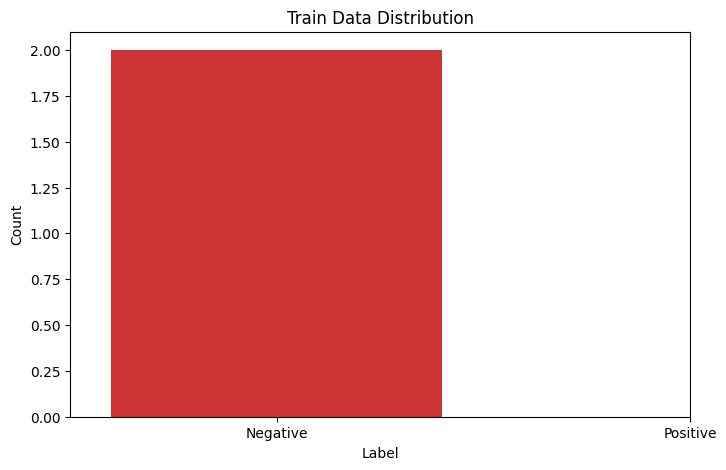

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(train_data['label'].value_counts(), palette='Set1')
plt.title('Train Data Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

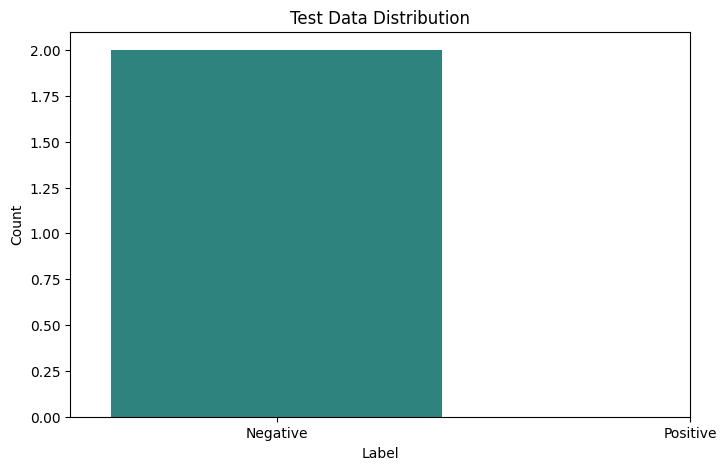

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(train_data['label'].value_counts(), palette='viridis')
plt.title('Test Data Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Equal Label distribution ~ 12,500 each positve and negative
- **Means it is a Balanced Dataset**

## Preprocess the Text

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back to string
    return ' '.join(tokens)

In [16]:
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

In [17]:
train_data['text'].head(5)

0    one wonderful rare moments tv wished id captur...
1    seen graduate hailed movie generation river ru...
2    dont watch lot tv except office weeds entourag...
3    kubrick puts display stunning ability craft pe...
4    first liked much central idea locating intrude...
Name: text, dtype: object

In [18]:
test_data['text'].head(5)

0    ive seen beginning muppet movie half watched m...
1    made years later would banned number one must ...
2    good precoder starring dick barthelmess way ki...
3    young man discovers life precious seriously in...
4    im always surprised given famous title track c...
Name: text, dtype: object

- **TF-IDF vectorization** : is a method used in natural language processing to convert text data into a numerical format that can be used by machine learning algorithms.
- It measures the importance of a word in a document relative to a collection of documents (corpus) by considering both the term frequency (TF) and the inverse document frequency (IDF).

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['label']

X_test = vectorizer.transform(test_data['text'])
y_test = test_data['label']

In [20]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1943962 stored elements and shape (25000, 5000)>
  Coords	Values
  (0, 953)	0.06769108081002208
  (0, 4191)	0.17469079444556715
  (0, 2460)	0.13060198480375318
  (0, 2501)	0.13231523146470806
  (0, 679)	0.1179170487564692
  (0, 405)	0.07479548014760817
  (0, 287)	0.1476834081741751
  (0, 4458)	0.06994736971922576
  (0, 47)	0.08258948531688037
  (0, 2089)	0.38453052893408307
  (0, 2556)	0.04924086694956055
  (0, 2739)	0.09890752906811287
  (0, 3095)	0.18671939030232593
  (0, 1808)	0.08598060578737034
  (0, 209)	0.15987509522422136
  (0, 4705)	0.13983109645062045
  (0, 2772)	0.12442623486398796
  (0, 4840)	0.17757272716758254
  (0, 2508)	0.08914035666922542
  (0, 4090)	0.13398500504127211
  (0, 2617)	0.10964584395637549
  (0, 769)	0.10515275197675297
  (0, 896)	0.13844799200905727
  (0, 3455)	0.09583689077157556
  (0, 3886)	0.09992079310399929
  :	:
  (24999, 4849)	0.021182647022013567
  (24999, 4457)	0.08620057510414787
  (24

In [21]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1899386 stored elements and shape (25000, 5000)>
  Coords	Values
  (0, 4819)	0.11360171837353814
  (0, 4275)	0.15901025380168402
  (0, 4071)	0.14714143629026566
  (0, 4032)	0.12458784168456541
  (0, 3861)	0.08210354001201667
  (0, 3804)	0.09321991801029576
  (0, 3791)	0.19884274287224632
  (0, 3397)	0.1976943460682157
  (0, 3269)	0.11160569880426459
  (0, 3191)	0.0775243412812476
  (0, 2897)	0.1893933219892828
  (0, 2891)	0.09681526550750967
  (0, 2832)	0.14511168254897328
  (0, 2758)	0.21023609203842059
  (0, 2745)	0.1468171271099974
  (0, 2737)	0.1955141281248012
  (0, 2732)	0.27057827486044345
  (0, 2674)	0.0779942233642361
  (0, 2668)	0.114597762550707
  (0, 2504)	0.14991207757373637
  (0, 2449)	0.21091057674962335
  (0, 2349)	0.17299327924669292
  (0, 2320)	0.10331636231089807
  (0, 2209)	0.17881342176015758
  (0, 2127)	0.12595231864687984
  :	:
  (24999, 2277)	0.17989936976192925
  (24999, 2261)	0.14402990576094452
  (

In [22]:
print(y_train)

0        1
1        1
2        1
3        1
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    0
Name: label, Length: 25000, dtype: int64


In [23]:
print(y_test)

0        1
1        1
2        1
3        1
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    0
Name: label, Length: 25000, dtype: int64


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_test)

In [27]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.8791
Precision: 0.8755
Recall: 0.8840
F1-Score: 0.8797


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



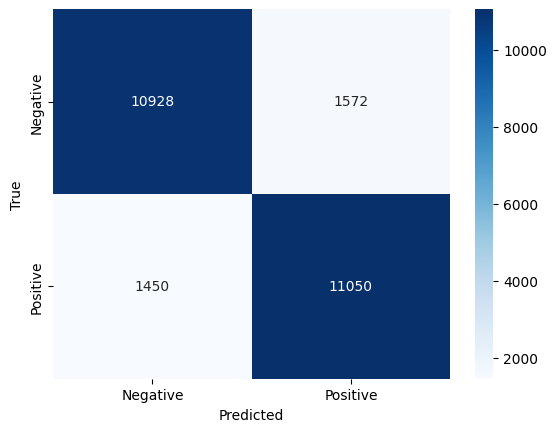

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### BERT

In [32]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [33]:
train_dataset = Dataset.from_pandas(train_data[['text', 'label']])
test_dataset = Dataset.from_pandas(test_data[['text', 'label']])

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [35]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [41]:
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [42]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, average='weighted')
    rec = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

In [45]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to="none"  # Disable W&B logging
)

In [46]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [47]:
print(np.__version__)

1.26.4


In [48]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.294900,0.290658,0.888520,0.892300,0.888520,0.888251
2,0.198100,0.281993,0.913440,0.913511,0.913440,0.913436
3,0.095000,0.376328,0.913320,0.913334,0.913320,0.913319


TrainOutput(global_step=4689, training_loss=0.21133779935375108, metrics={'train_runtime': 5821.9399, 'train_samples_per_second': 12.882, 'train_steps_per_second': 0.805, 'total_flos': 1.9733329152e+16, 'train_loss': 0.21133779935375108, 'epoch': 3.0})

In [49]:
eval_results = trainer.evaluate()

In [50]:
print("\nBERT Model Metrics:")
print(f"Accuracy: {eval_results['eval_accuracy']:.4f}")
print(f"Precision: {eval_results['eval_precision']:.4f}")
print(f"Recall: {eval_results['eval_recall']:.4f}")
print(f"F1-Score: {eval_results['eval_f1']:.4f}")


BERT Model Metrics:
Accuracy: 0.9134
Precision: 0.9135
Recall: 0.9134
F1-Score: 0.9134


In [51]:
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.92      0.91     12500
    Positive       0.92      0.91      0.91     12500

    accuracy                           0.91     25000
   macro avg       0.91      0.91      0.91     25000
weighted avg       0.91      0.91      0.91     25000



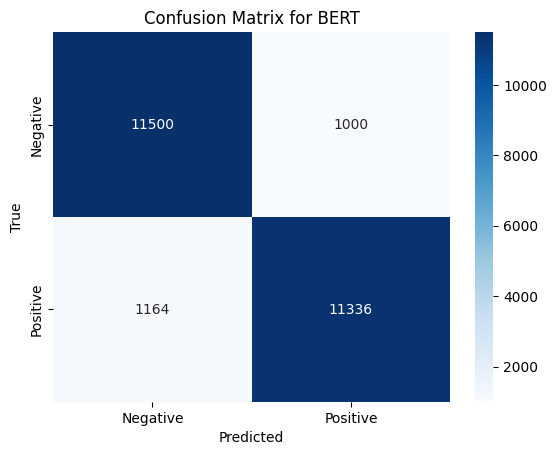

In [52]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BERT')
plt.show()